In [ ]:
# Code Written By:
    # Dora Courtney
    # Lu Salamy
    # Samantha Wilder

In [48]:
# Create a function to open and read in daily mean temperature for NYC Central Park (2010) from a
# .txt file. Using the readlines command to make the output a list. (Exercise #1)
def read_text(file):
    with open(file, 'r') as data:
        sat = data.readlines()
    return sat

In [49]:
# First import math in Python to use trig functions and pi (to use in Exercise #2)
import math

# Create a new function (lsq_fit) to calculate the model values and residual values, using the equations given
    # Function to compute y(t) and residuals (section added for Exercise #2 (02/21))
def lsq_fit (sat_nyc_2010):
    y_0 = 55.0 # degrees Fahrenheit
    A = 25.0 # degrees Fahrenheit
    t_0 = 200.0 # days
    T = 365.0 # days
    
    model_values = []
    residual_values = []
    # Create a for loop to calculate the model value and residual value for each data point in the given dataset
    for t in range(1, 366):
        model_value = y_0 + A * math.cos(2 * math.pi * (t - t_0) / T)
        residual = model_value - sat_nyc_2010[t-1]  # Adjust for Python's 0-based indexing
        # Append the calculated values to make 2 lists
        model_values.append(model_value)
        residual_values.append(residual)

    return model_values, residual_values

In [50]:
# Print the observed NYC temperature to the screen (updated for Exercise #2 (02/21))
def print_data(day_of_year, sat_nyc_2010, model_values, residual_values):
    print("{:<28} {:<28} {:<28} {:<28}".format("Day of Year (1-365)", "Observed Temperatures (\xb0F)", "Model Temperature Value (\xb0F)", "Residual (\xb0F)"))

    for day, obs, model, residual in zip(day_of_year, sat_nyc_2010, model_values, residual_values):
        print("{:<28} {:<28.1f} {:<28.1f} {:<28.1f}".format(day, obs, model, residual))

In [51]:
# We will plot the observed temperature with the day of year, as well as the residual values with the day
# of the year using a 'plot_ts' function (for Exercise #3)
import matplotlib.pyplot as plt

# Create a function using plot_ts (time-series), so when data is fed into the function, it outputs 1 figure with 2 subplots, and saves this figure
def plot_ts(day_of_year, sat_nyc_2010, model_values, residual_values):
    # Create a space for the plots to exist and give the figure a size guide
    plt.figure(figsize = (10, 8))
    # Top/first subplot: plotting observed data and modeled values with the days of the year
    plt.subplot(2, 1, 1)
    # Plot the correct x and y data sets and specify labels, color, and data marker. This subplot will have 2 sets of data
    plt.plot(day_of_year, sat_nyc_2010, label = 'Observations', color = 'orange', marker = '.')
    plt.plot(day_of_year, model_values, label = 'Pre-fit Model Values', color = 'blue', linestyle = '--', linewidth = 2)
    # Label the x-axis
    plt.xlabel('Day of Year (1-365)')
    # Label the y-axis
    plt.ylabel('Temperature (°F)')
    # Title the subplot
    plt.title('NYC Temperature Observations vs. Pre-fit Model Values over Day of Year')
    plt.legend()

    # Bottom/second subplot: plotting the residual values with the days of the year
    plt.subplot(2, 1, 2)
     # Plot the correct x and y data sets and specify labels, color, and data marker. This subplot will have 1 set of data
    plt.plot(day_of_year, residual_values, label = 'Residual Valuess', color = 'green', marker = '.')
    # Create a reference line. This makes it easier to decipher between positive/negative (above and below 0) residual data
    plt.axhline(0, color = 'gray', linestyle = '--', linewidth = .75)
    # Label the x-axis
    plt.xlabel('Day of Year (1-365)')
    # Label the y-axis
    plt.ylabel('Pre-fit Residual Values (°F)')
    # Title the subplot
    plt.title('Pre-fit Residuals Values over Day of Year')
    plt.tight_layout()

    # Save the figure as "Figure1.pdf"
    plt.savefig('Figure1.pdf')
    # Show the plot to the screen
    plt.show()

In [52]:
import netCDF4 as nc
import numpy as np

# Create a function for Exercise #4 (03/20)to read the NetCDF file and extract the SAT time series for the grid point closest to NYC Central Park.
def read_netcdf(file_path, lat_nyc=40.8, lon_nyc=286.0):
    # Open the NetCDF file
    nc_file = nc.Dataset(file_path, 'r')

    # Extract latitude and longitude variables from the NetCDF file
    lats = nc_file.variables['latitude'][:]  # Latitude values
    lons = nc_file.variables['longitude'][:]  # Longitude values

    # Find the indices of the grid point closest to NYC Central Park
        # Find the index of the latitude closest to NYC Central Park latitude
    lat_idx = np.argmin(np.abs(lats - lat_nyc))
        # Find the index of the longitude closest to NYC Central Park longitude
    lon_idx = np.argmin(np.abs(lons - lon_nyc))

    # Extract the SAT time series for the closest grid point
        # 'SAT' is the variable representing surface air temperature (2 meters above the surface) in the NetCDF file
    sat_time_series = nc_file.variables['SAT'][:, lat_idx, lon_idx]

    # Close the NetCDF file
    nc_file.close()

    return sat_time_series


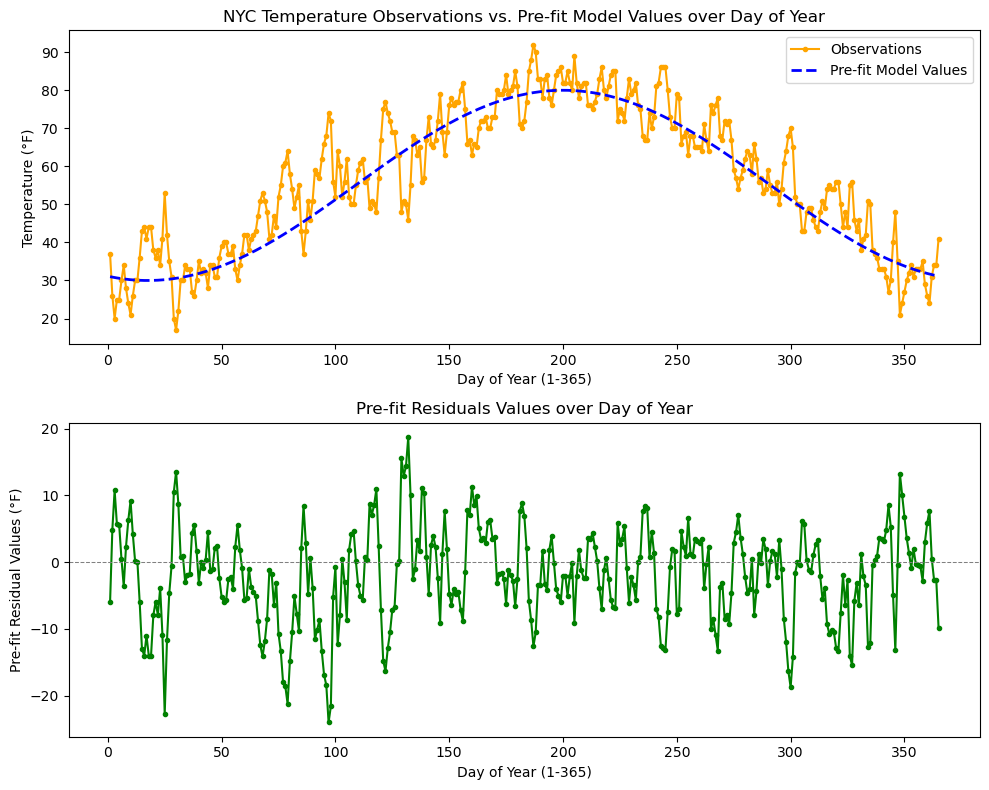

SAT Time Series for NYC Central Park Closest Grid Point:
[271.34905926 271.63646053 276.02329711 283.64736517 290.61728678
 293.76106878 296.7091358  296.85724443 293.35553325 287.1085228
 279.72953926 275.1558037  272.14249835 273.91627552 271.70346206
 283.86776492 288.49968601 293.7469632  295.30386701 295.25978706
 291.35254034 285.44759031 280.6552182  269.71810113 267.34659985
 272.40345165 276.12908898 280.63758622 286.93043981 293.76812157
 296.36707539 295.39379011 294.63385178 286.48258752 280.29376261
 273.05054531 271.03168363 270.32464124 276.04974508 283.02319309
 289.12385809 294.49632234 294.91772666 294.41697843 289.97724592
 285.35237762 277.80589026 270.7072552  269.58762448 268.42391381
 276.76207706 282.98263953 288.26870707 294.0096797  296.47992007
 294.41345203 289.33896825 287.16494514 281.89121998 270.18887499
 271.99791612 270.9682085  277.11119026 281.57913394 290.13593373
 293.28500533 296.40762895 294.02202208 291.66286319 284.45138345
 281.17007201 274.03

In [53]:
# Main Routine (updated for Exercise #4 (03/20))

# Specify the file name:
file_text = 'nyc_temp_2010.txt'
    # this text file contains the daily mean temperatures for NYC Central Park (2010)

# Now call the functions (read and print):
sat_nyc_2010 = read_text(file_text)
    # this function is passed the file name, reads in the temperature data, and returns the data

# Convert to integers
sat_nyc_2010 = [int(i) for i in sat_nyc_2010]


# Generate day_of_year list (1 to 365)
day_of_year = list(range(1, 366))

# Obtain pre-fit model values and residuals
pre_fit_model_values, pre_fit_residuals = lsq_fit(sat_nyc_2010)

# Print the data, now including pre-fit model values (3) and residuals (4) in addition to days of year (1) and observed
# temperatures (2) from Exercise #1 (02/14).
#print_data(day_of_year, sat_nyc_2010, pre_fit_model_values, pre_fit_residuals)
    # this null function is passed the temperature data. The function prints to the screen four columns with headers:
        # - one column indicating the day of the year (1-365),
        # - and a second column indicating the temperature observation for each day.
    # Be sure to indicate the units of the temperature data (°F)
# Call the plotting (time-series) function and display/save the figure (for Exercise #3)
plot_ts(day_of_year, sat_nyc_2010, pre_fit_model_values, pre_fit_residuals)

# Using/calling the read_netCDF function, extract the SAT time series for the grid point closest to NYC Central Park (Exercise #4)
file_path = 'ERA5_SAT_195901-202112.nc'
sat_time_series = read_netcdf(file_path)

print("SAT Time Series for NYC Central Park Closest Grid Point:")
print(sat_time_series)